In [2]:
import openjij as oj
import openjij.cxxjij.graph as G
import openjij.cxxjij.system as S
import openjij.cxxjij.utility as U
import openjij.cxxjij.algorithm as A
import openjij.cxxjij.result as R
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# サンプラーの設定
sampler = oj.SASampler(num_reads=100)

# 全結合問題の定義
def fully_connected(n):
    h, J = {}, {}
    for i in range(n-1):
        for j in range(i+1, n):
            J[i, j] = -1/n
    return h, J

# h, Jの設定
h, J = fully_connected(n=500)

In [8]:
# 温度のリストの作成
temp_list = np.linspace(0.01, 2, 30)

# 磁化とその分散を計算
mag, mag_std = [], []
for temp in temp_list:
    beta = 1.0/temp
    schedule = [[beta, 200]]
    response = sampler.sample_ising(h, J, schedule=schedule)
    print(response.states.shape)
    mag_list = [np.abs(np.mean(state)) for state in response.states]
    mag_std.append(np.std(mag_list))
    mag.append(np.mean(mag_list))

(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)
(100, 500)


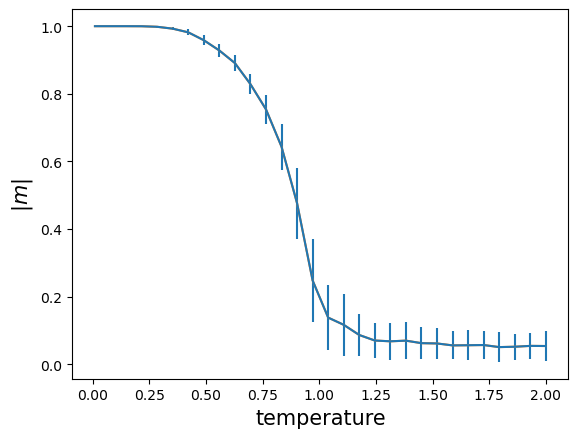

In [5]:
# 結果の可視化
plt.errorbar(temp_list, mag, yerr=mag_std)
plt.plot(temp_list, mag)
plt.xlabel('temperature', fontsize=15)
plt.ylabel(r'$|m|$', fontsize=15)
plt.show()